<a href="https://colab.research.google.com/github/Abuelias2020/lab-1/blob/main/lab_14AlqunaynahSiraj_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 14 - Principal Component Analysis

#### A large part of the code was taken from <br>
#### 1. https://github.com/ageron/handson-ml <br>
#### 2. https://www.kaggle.com/residentmario/dimensionality-reduction-and-pca-for-fashion-mnist

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from timeit import default_timer as timer

#### Load the Fashion MNIST dataset

In [43]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

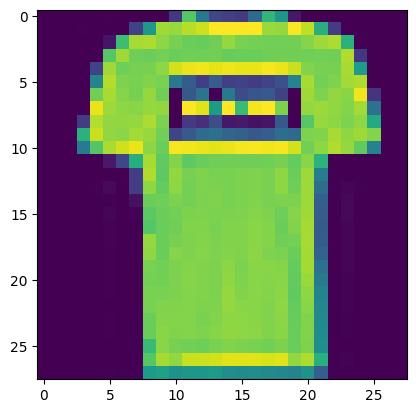

In [37]:
#plt.imshow(X_train[0])
plt.imshow(X_train[1])

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
X_train=X_train.reshape(60000, 28*28)

In [46]:
X_train.shape

(60000, 784)

In [47]:
X_test.shape

(10000, 28, 28)

In [48]:
X_test=X_test.reshape(10000, 28*28)

In [49]:
X_test.shape

(10000, 784)

#### Projecting down to d = 4 dimensions

#### The top *d* principal components are projected onto a hyperplane, which causes the dimensionality of the dataset to be reduced to *d* dimenions.

In [50]:
#standarizing the features

In [51]:
pca = PCA(n_components = 4)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


#### Explained Variance Ratio

In [52]:
pca.explained_variance_ratio_


array([0.29039228, 0.1775531 , 0.06019222, 0.04957428])

<Axes: >

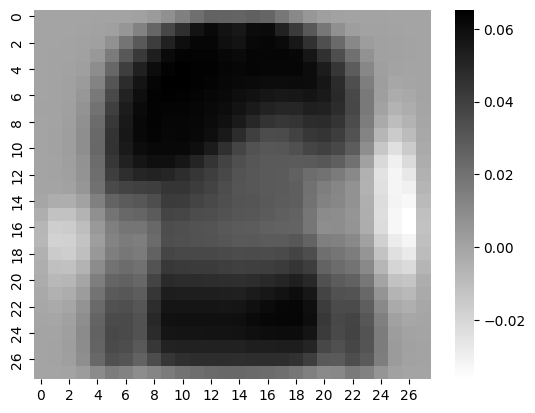

In [53]:
sns.heatmap(pca.components_[0].reshape(28, 28), cmap='gray_r')

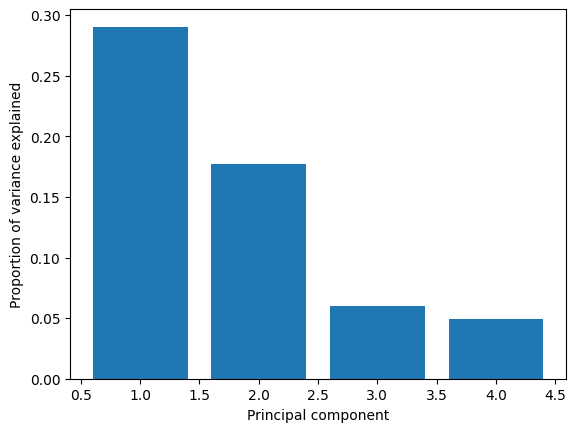

In [54]:
#task 3:explained variance ratio
plt.bar(range(1,5),pca.explained_variance_ratio_)
plt.xlabel("Principal component")
plt.ylabel("Proportion of variance explained")
plt.show()

#### Preserving the training set's variance

#### This step automatically selects a certain number of dimensions, that will sum to the specified variance.

In [55]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d1 = np.argmax(cumsum >= 0.25)+1
d2 = np.argmax(cumsum >= 0.50)+1
d3 = np.argmax(cumsum >= 0.75)+1
d4 = np.argmax(cumsum >= 0.95)+1
d5 = np.argmax(cumsum >= 1.00)+1

To preserve 0.25 variance, we need 1 components
To preserve 0.5 variance, we need 3 components
To preserve 0.75 variance, we need 14 components
To preserve 0.95 variance, we need 187 components


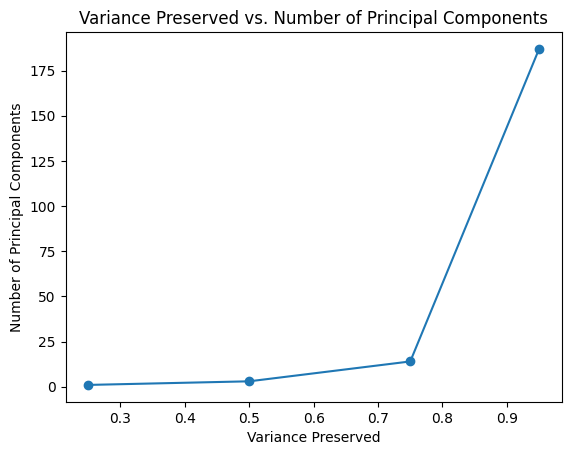

In [60]:
#task4: preserving the traing set's varinance
variances = [0.25, 0.5, 0.75, 0.95]
n_components = []

for variance in variances:
    pca = PCA(variance)
    pca.fit(X_train)
    n_components.append(pca.n_components_)
    print("To preserve", variance, "variance, we need", pca.n_components_, "components")


plt.plot(variances, n_components, marker='o')  # Added marker for data points
plt.xlabel("Variance Preserved")
plt.ylabel("Number of Principal Components")
plt.title("Variance Preserved vs. Number of Principal Components")
plt.show()

In [61]:
print("The number of Principal Components required to obtain -\n 1. 25% variance = ",d1," \n 2. 50% variance = ",d2," \n 3. 75% variance =", d3,"\n 4. 95% variance = ",d4,"\n 5. 100% variance = ",d5)

The number of Principal Components required to obtain -
 1. 25% variance =  1  
 2. 50% variance =  3  
 3. 75% variance = 14 
 4. 95% variance =  187 
 5. 100% variance =  784


#### Compressing datasets using PCA

#### We can compress datasets using PCA and therefore use it to acclerate ML algorithms!

In [62]:
X_train=X_train.astype('float64')
pca = PCA(n_components = 187)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [63]:
X_train.dtype

dtype('float64')

In [64]:
X_train.nbytes

376320000

In [65]:
X_train.dtype

dtype('float64')

In [66]:
X_reduced.nbytes

89760000

In [67]:
X_reduced.dtype

dtype('float64')

In [68]:

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Recovered after compression')

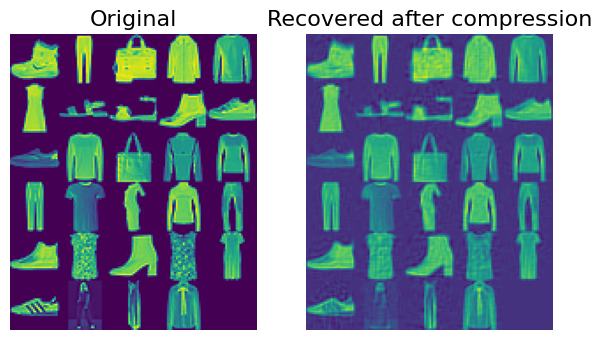

In [69]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recovered after compression", fontsize=16)



## PCA to Speed-up Machine Learning Algorithms

## Fit and predict X_train vs X_train_pca with Classifier

To mesuare your running time (timer) sample code:

from timeit import default_timer as timer

start = timer()
# ...
end = timer()
print(end - start) # Time in seconds, e.g. 5.38091952400282

Using LogisticRegression Classifier on PCA(n_components = 4)

Scaler:


from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [70]:
#from sklearn.preprocessing import StandardScaler
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [71]:
pca = PCA(n_components = 187)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [87]:
start = timer()


log_clf = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf.fit(X_train, y_train)
end = timer()
print("LogisticRegression Classifier on orginal data - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282
print()

LogisticRegression Classifier on orginal data - Training time:  47.06007339500002



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
start = timer()


log_clf_pca= LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf_pca.fit(X_train_pca, y_train)


end = timer()
print("LogisticRegression Classifier on  PCA(n_components = 187)- Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282
print()

LogisticRegression Classifier on  PCA(n_components = 187)- Training time:  49.285763194999845



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
from sklearn.metrics import accuracy_score

In [90]:
#predict orginal one
y_pred = log_clf.predict(X_test)
print("LogisticRegression Classifier on orginal data- Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on orginal data- Accuracy:  0.8439


In [91]:
#predict
y_pred = log_clf_pca.predict(X_test_pca)
print("LogisticRegression Classifier on Scale PCA(n_components = 187) - Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on Scale PCA(n_components = 187) - Accuracy:  0.8439


In [92]:
from sklearn.metrics import accuracy_score

print("LogisticRegression Classifier on Scale PCA(n_components = 4) - Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on Scale PCA(n_components = 4) - Accuracy:  0.8439


In [93]:
pca = PCA(n_components = 187)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [94]:

from sklearn.linear_model import LogisticRegression

# solver = 'lbfgs' for better performance

from timeit import default_timer as timer

start = timer()


log_clf = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf.fit(X_train_pca, y_train)


end = timer()
print("LogisticRegression Classifier on PCA(n_components = 4) - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282
print()

LogisticRegression Classifier on PCA(n_components = 4) - Training time:  11.548864406999883



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Reference for solver = 'lbfgs'

https://scikit-learn.org/stable/modules/linear_model.html

The “lbfgs” is an optimization algorithm that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm [8], which belongs to quasi-Newton methods. The “lbfgs” solver is recommended for use for small data-sets but for larger datasets its performance suffers. [9]

In [95]:
#predict
y_pred = log_clf.predict(X_test_pca)

In [ ]:
from sklearn.metrics import accuracy_score

print("LogisticRegression Classifier on PCA(n_components = 4) - Accuracy: ",accuracy_score(y_test, y_pred))

Using LogisticRegression Classifier on PCA(n_components = 14)

In [97]:
pca = PCA(n_components = 14)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [98]:

from sklearn.linear_model import LogisticRegression


start = timer()


log_clf = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf.fit(X_train_pca, y_train)


end = timer()
print("LogisticRegression Classifier on PCA(n_components = 14) - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282



LogisticRegression Classifier on PCA(n_components = 14) - Training time:  3.375064342000087


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
#predict
y_pred = log_clf.predict(X_test_pca)

In [100]:
from sklearn.metrics import accuracy_score

print("LogisticRegression Classifier on PCA(n_components = 14) - Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on PCA(n_components = 14) - Accuracy:  0.7687


Using LogisticRegression Classifier on PCA(n_components = 187)

In [101]:
pca = PCA(n_components = 4)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [102]:

from sklearn.linear_model import LogisticRegression


start = timer()


log_clf = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf.fit(X_train_pca, y_train)


end = timer()
print("LogisticRegression Classifier on PCA(n_components = 187) - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282


LogisticRegression Classifier on PCA(n_components = 187) - Training time:  2.7315065259999756


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
#predict
y_pred = log_clf.predict(X_test_pca)

In [104]:
from sklearn.metrics import accuracy_score

print("LogisticRegression Classifier on PCA(n_components = 187) - Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on PCA(n_components = 187) - Accuracy:  0.6673


Using LogisticRegression Classifier on PCA(n_components = 784)

In [83]:
pca = PCA(n_components = 784)
X_train_pca=pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [105]:

from sklearn.linear_model import LogisticRegression


start = timer()


log_clf_pca = LogisticRegression(solver = 'lbfgs', multi_class='auto')

log_clf_pca.fit(X_train_pca, y_train)


end = timer()
print("LogisticRegression Classifier on PCA(n_components = 784) - Training time: ", end - start) # Time in seconds, e.g. 5.38091952400282




LogisticRegression Classifier on PCA(n_components = 784) - Training time:  2.779900256000019


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
#predict
y_pred = log_clf_pca.predict(X_test_pca)

In [107]:
from sklearn.metrics import accuracy_score

print("LogisticRegression Classifier on PCA(n_components = 784) - Accuracy: ",accuracy_score(y_test, y_pred))

LogisticRegression Classifier on PCA(n_components = 784) - Accuracy:  0.6673


In [109]:
from sklearn.svm import SVC

svm_clf_pca = SVC()

svm_clf_pca.fit(X_train_pca, y_train)

y_pred = svm_clf_pca.predict(X_test_pca)

In [110]:
from sklearn.linear_model import LogisticRegression


log_clf_pca = LogisticRegression()

log_clf_pca.fit(X_reduced, y_train)

y_pred = log_clf_pca.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: ignored

In [111]:
from sklearn.linear_model import LogisticRegression

log_clf_pca = LogisticRegression()

log_clf_pca.fit(X_train_pca, y_train)  # Assuming you have X_train_pca and y_train defined

y_pred = log_clf_pca.predict(X_test_pca)  # Assuming you have X_test_pca defined

# Now you can use y_pred for further analysis or evaluation


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Let’s look at each classifier’s accuracy on the test set:
  

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)


print(clf.class.name, accuracy_score(y_test, y_pred))

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))